## Home comfort

In [6]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import math
from datetime import datetime

### Importing and separating the data into columns

The information is all stored in a single column **'info'**, which needs to be 



In [ ]:
hc1 = pd.read_csv("/Users/joaop.cardoso/MestradoCD/VI/Projecto VI/dataset/sgh020177a7a91d.csv")

# This looks at each row in 'info' column, and loads the element 'x' with the information, and if the element is empty, it returns an
# empty dictionary {}

hc1.head()

hc1['date'] = pd.to_datetime(hc1['date'], format="mixed").dt.strftime('%Y-%m-%d %H:%M:%S')
hc1['info'] = hc1['info'].apply(lambda x: json.loads(x) if pd.notnull(x) else {})


# The line below flattens the dictionary element 'x' from before into separate columns for each key in the dictionaries

hc1_expanded = pd.json_normalize(hc1['info'])

hc1_final = pd.concat([hc1[['date']], hc1_expanded], axis=1)

print(hc1_final.tail())

hc1_final.to_csv('/Users/joaop.cardoso/MestradoCD/VI/Projecto VI/VI---Home-Comfort/hc1_final.csv', index=False)



                       date state device type message  illuminance  linkquality occupancy  temperature  humidity  pressure contact  temp description winddirection  precipitation  windspeed  battery  voltage feedback
160982  2020-10-22 15:58:33   NaN    NaN  NaN     NaN          NaN         34.0       NaN        22.68     68.13    1007.6     NaN   NaN         NaN           NaN            NaN        NaN     31.0   2825.0      NaN
160983  2020-10-22 15:58:33   NaN    NaN  NaN     NaN          NaN         34.0       NaN        22.68     68.13    1007.0     NaN   NaN         NaN           NaN            NaN        NaN     31.0   2825.0      NaN
160984  2020-10-22 15:58:54   NaN    NaN  NaN     NaN         18.0         26.0     False          NaN       NaN       NaN     NaN   NaN         NaN           NaN            NaN        NaN    100.0   3025.0      NaN
160985  2020-10-22 16:01:09   NaN    NaN  NaN     NaN         22.0         31.0     False          NaN       NaN       NaN     NaN   NaN

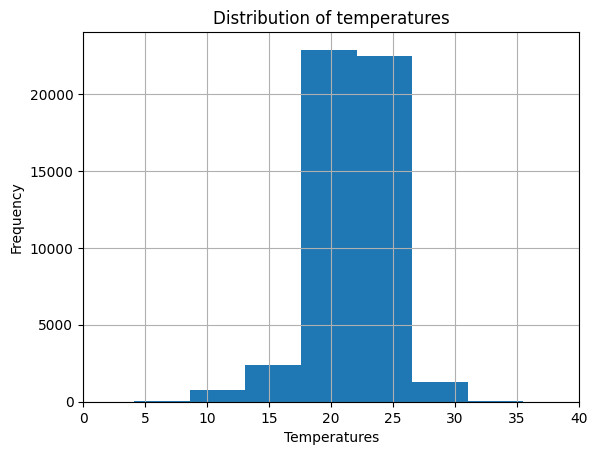

In [7]:
fig, ax = plt.subplots()
hc1['temperature'].hist(bins = 30, ax = ax)

ax.set(title = 'Distribution of temperatures', xlabel = 'Temperatures', ylabel = 'Frequency', xlim = (0, 40))

plt.show()

In [8]:

#encoded_hc1 = pd.get_dummies(hc1, drop_first = True) # drop_first avoids multicollinearity (correlation btw dummy variables)

#encoded_hc1.info()

numeric_hc1 = hc1.select_dtypes(include = 'number')

non_num_hc1 = hc1.select_dtypes(exclude = 'number')

# Compute the correlation matrix for the variables in a single individual dataset
corr_matrix = numeric_hc1.corr()

[Text(0, 0, 'illuminance'),
 Text(0, 1, 'linkquality'),
 Text(0, 2, 'temperature'),
 Text(0, 3, 'humidity'),
 Text(0, 4, 'pressure'),
 Text(0, 5, 'temp'),
 Text(0, 6, 'precipitation'),
 Text(0, 7, 'windspeed'),
 Text(0, 8, 'battery'),
 Text(0, 9, 'voltage')]

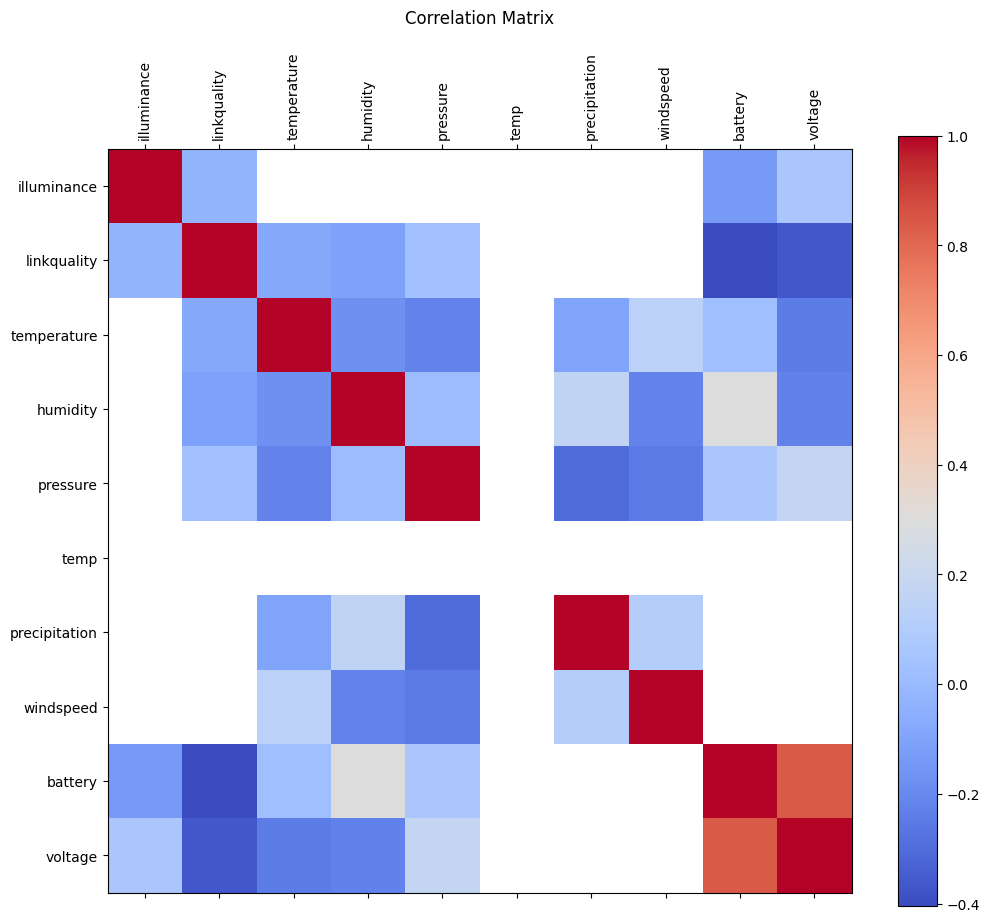

In [9]:
# Display the correlation matrix as as heatmap 
fig, ax = plt.subplots(figsize = (12,10))
# Create the heatmap using the ax object (can't use ax)
heatmap = ax.matshow(corr_matrix, cmap = 'coolwarm')

# Create the colorbar
fig.colorbar(heatmap)

# Set the title and axis labels
ax.set_title('Correlation Matrix', pad = 20)
ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation = 90)
ax.set_yticklabels(corr_matrix.columns)

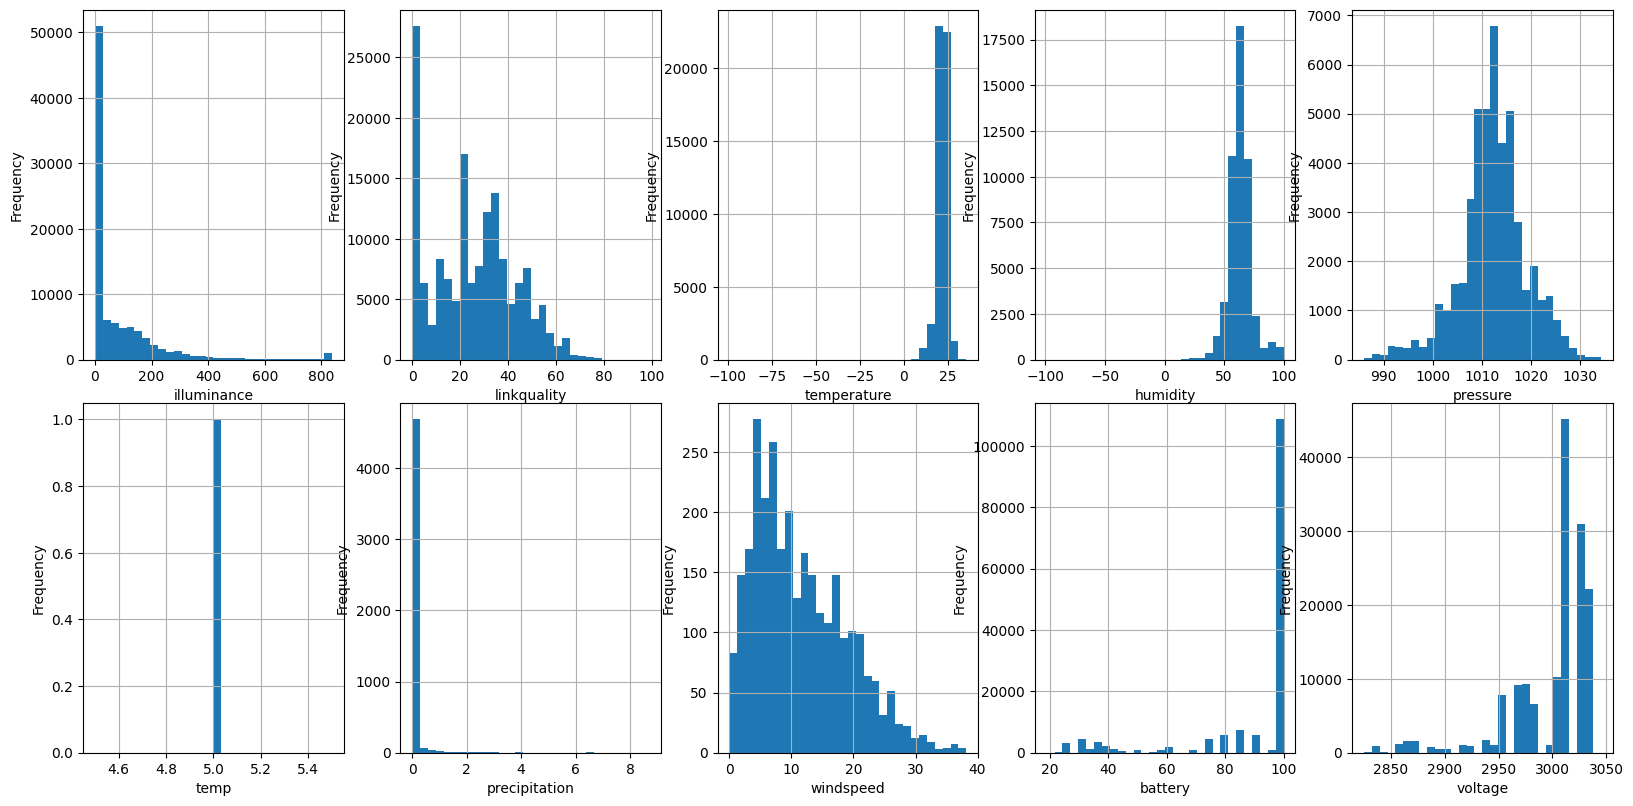

In [10]:
# Histograms for numerical variables

num_vars = len(numeric_hc1.columns)
num_cols = 5
num_rows = math.ceil((num_vars / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize = (16, num_rows * 4))
fig.tight_layout(pad = 1)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot a histogram for each variable
for i, column, in enumerate(numeric_hc1.columns):
    ax = axes[i]
    hc1[column].hist(bins = 30, ax = ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

#Hide any empty subplot if the number of variables is not a perfect grid
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)
plt.show()